# ITMAL Exercise

REVISIONS| |
---------| |
2018-0301| CEF, initial.
2018-0306| CEF, updated.
2018-0307| CEF, split Qb into Qb+c+d and added NN comment.
2018-0311| CEF, updated Qa and $w_0$ issues.
2018-0311| CEF, updated Qd with plot and Q.
2018-0311| CEF, clarified $w_0$ issue and update $\tilde{J}$'s.
2019-1015| CEF, updated for ITMAL E19.
2019-1019| CEF, updated text, added float-check functions.
2020-0323| CEF, updated to ITMAL F20.
2020-1020| CEF, updated to ITMAL E20.
2020-1027| CEF, minor updates.
2020-1028| CEF, made preprocessing optional part of Qq (tug-of-war).

## Regulizers

### Resume of The Linear Regressor

For our  data set $\mathbf{X}$ and target $\mathbf{y}$ 

$$
    \newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\mbox{\scriptsize #1}}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\pred{_{\scriptsize\mbox{pred}}}
    \def\bM{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \newcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \newcommand\dfrac[2]{\frac{\mbox{d}~#1}{\mbox{d}#2}}
\bX =
    \ac{cccc}{
        x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
        x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
        \vdots      &             &        & \vdots \\
        x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
    }
, ~~~~~~~~
\by =
    \ac{c}{
         y\pown{1} \\
         y\pown{2} \\
         \vdots \\
         y\pown{n} \\
    }
%, ~~~~~~~~
%\bx\powni = 
%    \ac{c}{
%        1\\
%        x_1\powni \\
%        x_2\powni \\ 
%        \vdots \\
%        x_d\powni
%     }  
$$

a __linear regressor__ model, with the $d$-dimensional (expressed here withoutthe bias term, $w_0$) weight column vector,

$$
\bw =
    \ac{c}{
         w_1 \\
         w_2 \\
         \vdots \\
         w_d \\
    }
$$


was previously found to be of the form

$$
    y\powni\pred =  \bw^\top \bx\powni
$$

for a single data instance, or for the full data set in a compact matrix notation 

$$
    \by\pred = \bX \bw
$$

(and rememering to add the bias term $w_0$ on $\bw$ and correspondingly adding fixed '1'-column in the $\bX$ matrix, later.) 

An accociated cost function could be the MSE 

$$
\ar{rl}{
    \mbox{MSE}(\bX,\by;\bw) &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                            &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni\pred \right)^2\\
                            &\propto ||\bX \bw - \by\pred||_2^2
}
$$                   

here using the squared Euclidean norm, $\norm{2}^2$, via the $||\cdot||_2^2$ expressions. We used the MSE to express the total cost function, $J$, as

$$
   \mbox{MSE} \propto J = ||\bX \bw - \by\pred||_2^2
$$

give or take a few constants, like $1/2$ or $1/n$.

### Adding Regularization to the Linear Regressor

Now the weights, $\bw$ (previously also known as $\btheta$), in this model are free to take on any value they like, and this can  lead to both numerical problems and overfitting, if the algorithm decides to drive the weights to insane, humongous values, say $10^{200}$ or similar.

Also for some models, neural networks in particular, having weights outside the range -1 to 1 (or 0 to 1) may cause complete saturation of some of the internal non-linear components (the activation function). 

Now, enters the ___regularization___ of the model: keep the weights at a sane level while doing the numerical gradient descent (GD) in the search space. This can quite simply be done by adding a ___penalty___ part, $\Omega$, to the $J$ function as

$$
    \ar{rl}{
        \tilde{J} &= J + \alpha \Omega(\bw)\\
                  &= \frac{1}{n} ||\bX \bw - \by||_2^2 + \alpha ||\bw||^2_2
     }
$$

So, the algorithm now has to find an optimal value (minimum of $J$) for both the usual MSE part and for the added penalty scaled with the $\alpha$ constant.

### Regularization and Optimization for Neural Networks (NNs)

The regularization method mentioned here is strictly for a linear regression model, but such a model constitutes a major part of the neurons (or perceptrons), used in neural networks. 

### Qa The Penalty Factor

Now, lets examine  what $||\bw||^2_2$ effectively mean? It is composed of our well-known $\norm{2}^2$ norm and can also be expressed as simple as

$$
  ||\bw||^2_2 = \bw^\top\bw
$$

Construct a penaltiy function that implements $\bw^\top\bw$, re-using any functions from `numpy` (implementation could be a tiny _one-liner_).

Take $w_0$ into account, this weight factor should NOT be included in the norm. Also checkup on `numpy`s `dot` implementation, if you have not done so already: it is a typical pythonic _combo_ function, doing both dot op's (inner product) and matrix multiplication (outer product) dependent on the shape of the input parameters.

Then run it on the three test vectors below, and explain when the penalty factor is low and when it is high.

In [2]:
# Qa..first define some numeric helper functions for the test-vectors..

import numpy as np
import collections

def isFloat(x):
    # is there a python single/double float??
    return isinstance(x, float) or isinstance(x, np.float32) or isinstance(x, np.float64)
    # NOT defined on Windows?:   or isinstance(x, np.float128)      

# Checks that a 'float' is 'sane' (original from libitmal)
def CheckFloat(x, checkrange=False, xmin=1E-200, xmax=1E200, verbose=0):
    if verbose>1:
        print(f"CheckFloat({x}, type={type(x)}")
    if isinstance(x, collections.Iterable):
        for i in x:
            CheckFloat(i, checkrange=checkrange, xmin=xmin, xmax=xmax, verbose=verbose)
    else:
        #if (isinstance(x,int)):
        #    print("you gave me an integer, that was ignored")
        #    return
        assert isFloat(x), f"x={x} is not a float/float64/numpy.float32/64/128, but a {type(x)}"
        assert np.isnan(x)==False , "x is NAN"
        assert np.isinf(x)==False , "x is inf"
        assert np.isinf(-x)==False, "x is -inf"
        # NOTE: missing test for denormalized float
        if checkrange:
            z=fabs(x)
            assert z>=xmin, f"abs(x)={z} is smaller that expected min value={xmin}"
            assert z<=xmax, f"abs(x)={z} is larger that expected max value={xmax}"
        if verbose>0:
             print(f"CheckFloat({x}, type={x} => OK")

# Checks that two 'floats' are 'close' (original from libitmal)
def CheckInRange(x, expected, eps=1E-9, autoconverttofloat=True, verbose=0):
    assert eps>=0, "eps is less than zero"
    if autoconverttofloat and (not isFloat(x) or not isFloat(expected) or not isFloat(eps)):
        if verbose>1:
            print(f"notice: autoconverting x={x} to float..")
        return CheckInRange(1.0*x, 1.0*expected, 1.0*eps, False, verbose)
    CheckFloat(x)
    CheckFloat(expected)
    CheckFloat(eps)
    x0 = expected - eps
    x1 = expected + eps
    ok = x>=x0 and x<=x1
    absdiff = np.fabs(x-expected)
    if verbose > 0:
        print(f"CheckInRange(x={x}, expected={expected}, eps={eps}: x in [{x0}; {x1}] => {ok}")
    assert ok, f"x={x} is not within the range [{x0}; {x1}] for eps={eps}, got eps={absdiff}"

print("OK(setup..)")

OK(setup..)


In [2]:
# TODO: code
    
def Omega(w):
    assert False, "TODO: implement Omega() here and remove this assert.."
 
# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'    
w_a = np.array([1., 2., -3.])  
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13

CheckInRange(p_a, e0)
CheckInRange(p_b, e1)
CheckInRange(p_c, e2)

print("OK")

AssertionError: TODO: implement Omega() here and remove this assert..

## Adding Regularization for Linear Regression Models

Adding the penalty $\alpha ||\bw||^2_2$ actually corresponds to the Scikit-learn model `sklearn.linear_model.Ridge` and there are, as usual, a bewildering array of regulized models to choose from in Scikit-learn with exotic names like `Lasso` and `Lars`

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Let us just examine `Ridge`, `Lasso` and `ElasticNet` here.

### Qb Explain the Ridge Plot

First take a peek into the plots (and code) below, that fits the `Ridge`, `Lasso` and `ElasticNet` to a polynomial model. The plots show three fits with different $\alpha$ values (0, 10$^{-5}$, and 1).

First, explain what the different $\alpha$ does to the actual fitting for the `Ridge` model in the plot.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7442427393463036, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7739590093335167, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


OK(plot)


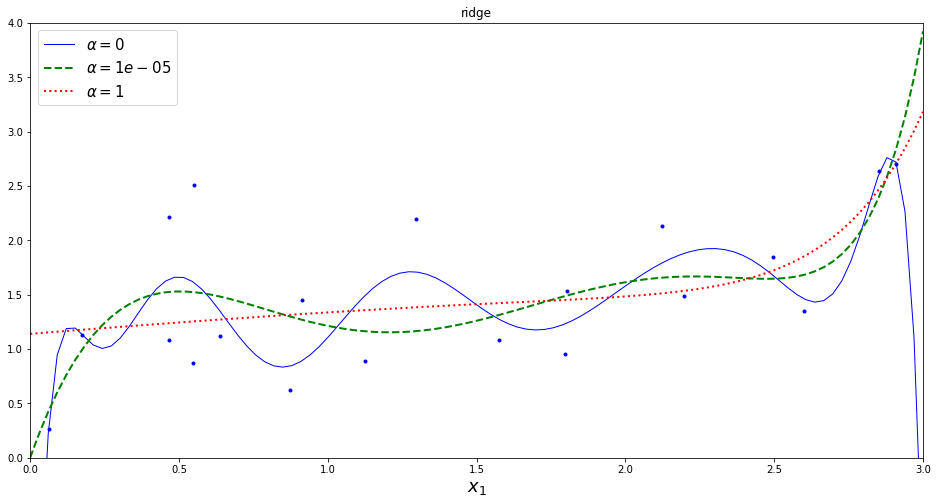

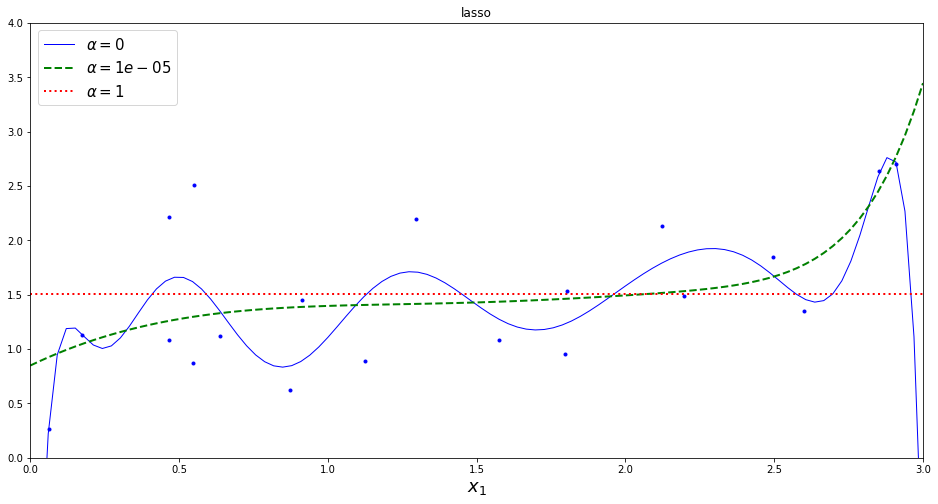

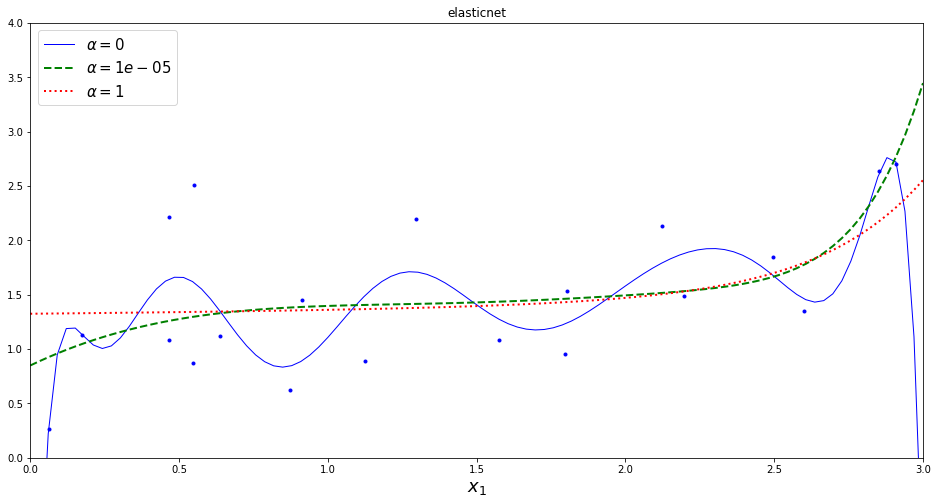

In [3]:
# TODO: Qb, just run the code..

%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(16,8))
    
    alphas=(0, 10**-5, 1) 
    random_state=42
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y
    
X, X_new, y = GenerateData()

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

print("OK(plot)")

### Qc Explain the Ridge, Lasso and ElasticNet Regulized Methods

Then explain the different regularization methods used for the `Ridge`, `Lasso` and `ElasticNet` models, by looking at the math formulas for the methods in the Scikit-learn documentation and/or using [HOML].

In [ ]:
# TODO:(in text..)
assert False, "Explain the math of Ridge, Lasso and ElasticNet.."

### Qd Regularization and Overfitting

Finally, comment on how regularization may be used to reduce a potential tendency to overfit the data

Describe the situation with the ___tug-of-war___ between the MSE ($J$) and regulizer ($\Omega$) terms in $\tilde{J}$ 

$$
  \tilde{J} = J + \alpha \Omega(\bw)\\
$$
and the potential problem of $\bw^*$ being far, far away from the origin, and say for a fixed $\alpha=1$ in regulizer term (normally for real data $\alpha \ll 1$).


<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-91831/Fildeling/L08/Figs/weights_regularization_l2.png" alt="WARNING: you need to be logged into Blackboard to view images" style="width:240px">

OPTIONAL part: Would data preprocessing in the form of scaling, standardization or normalization be of any help to that particular situation? If so, describe.

In [ ]:
# TODO: (in text..)
Assert False, "Explain the tug-of-war.."